## Homework 06: Optimization in Python

## Due Date: March 29, 2021, 4:00pm

#### Firstname Lastname: Yuhan Liu

#### E-mail: yl7576@nyu.edu

#### Enter your solutions and submit this notebook

---

**Problem 1 (30p)**

We examine a product of non-negative numbers given their sum. Concretely, the problem is to find all $(x, y, z)$ among all non-negative reals $x, y, z \geq 0$ such that
their product $P(x, y, z) = x y z$ is maximized, given their sum $x + y + z = 270$. 


1.1. (15p)
Cast the problem as a nonlinear two-dimensional optimization problem over with box constraints (*hint*: remove the sum constraint, and ignore one of the positivity constraints which should not be violated with proper initialization) and solve it using the L-BFGS-B method of `scipy.optimize.minimize`.

1.2. (15p)
Cast the problem as an equivalent one-dimensional constrained optimization problem (*hint*: after removing the sum constraint, can you further use optimality conditions to remove one more variable?), and solve it using `scipy.optimize.minimize_scalar`.



### 1.1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
import sympy

In [106]:
def p(X):
    x, y = X
    return -x*y*(270-x-y)

bnd_x, bnd_y = (0, 270), (0, 270)

opt = optimize.minimize(p, np.array([1,1]), method='L-BFGS-B', 
                               bounds=[bnd_x, bnd_y]).x
x = round(opt[0],0)
y = round(opt[1],0)
z = round(270-opt[0]-opt[1],0)
print('x,y,z = ', x,y,z)
print('P(x,y,x) = xyz =',x*y*z)

x,y,z =  90.0 90.0 90.0
P(x,y,x) = xyz = 729000.0


### 1.2

Based on the two dimensional p function in 1.1, we can find partial derivative of p with regard to y and set it to zero, which is 270x - x^2 -2xy = 0. Therefore, we can get y = (270-x)/2. Then the original p can be written as x*((270-x)/2)^2. 

In [105]:
#1.2
def p_2(x):
    return -x*((270-x)/2)**2
bnd_x2 = (0,270)
opt_x = round(optimize.minimize_scalar(p_2, method='bounded', bounds= bnd_x2).x,0)
opt_y = opt_z = round((270-opt_x)/2,0)
print('x,y,z = ', opt_x,opt_y,opt_z)
print('P(x,y,x) = xyz =', opt_x * opt_y * opt_z)

x,y,z =  90.0 90.0 90.0
P(x,y,x) = xyz = 729000.0


---

**Problem 2 (70p)**

Let us consider the following function,

$$h(x, y) := (x^2 + y - 10)^2 + (x + y^2 - 17)^2.$$
    
find **all extremal** points (both minima and maxima) in the region $-10 \leq x, y \leq 10$.


The goal is to: (a) find extremal points; (b) compare convergence, i.e. the numbers of: Iterations, Function evaluations, Gradient evaluations, Hessian evaluations.


Solve the problem by using the Newton optimization routine "scipy.optimize.fmin_ncg":

2.1. (20p) providing gradient (fprime) and Hessian (fhess) in "scipy.optimize.fmin_ncg"

2.2. (20p) providing only gradient (fprime) in "scipy.optimize.fmin_ncg"

Solve the problem by using the quasi-Newton optimization routine "fmin_bfgs":

2.3. (20p) **not** providing gradient (fprime) or Hessian (like in "scipy.optimize.fmin_ncg").


Use JAX for computing the gradient and Hessian as in the lecture. (make sure the gradient and Hessian are correctly computed).


2.4. (10p) Plot $h(x, y)$ in the given region $-10 \leq x, y \leq 10$.


**Hint**: Note there are multiple extremal points in the given region. So one has to run the Newton routine with different starting points in order to find different extremal points. 


For every extremal point report: 
- (xopt, yopt)
- h(xopt, yopt)
- (xstart, ystart)
- the number of Iterations
- the number of Function evaluations
- the number of Gradient evaluations
- the number of Hessian evaluations.

**Hint 2:** There are both local mimima and maxima; notice that "scipy.optimize.fmin_ncg" finds "minimum" not the "maximum". To locate stationary points, partition $-10 \leq x, y \leq 10$ into multiple regions and use "optimize.brute" in each of these regions. Then use the resulting points as starting points in "scipy.optimize.fmin_ncg".


### 2.1

In [80]:
#2.1
import jax.numpy as jnp
from jax import jit, grad, hessian

In [93]:
def f(x):
    return (x[0]**2 + x[1] - 10)**2 + (x[0] + x[1]**2 - 17)**2

def find_max_f(x):
    return -((x[0]**2 + x[1] - 10)**2 + (x[0] + x[1]**2 - 17)**2)

x, y = sympy.symbols("x, y")
h = (x**2 + y - 10) ** 2 + (x + y**2 - 17)**2

sympy.Matrix([h.diff(x_) for x_ in (x, y)])
sympy.Matrix([[h.diff(u, v) for u in (x, y)] for v in (x, y)])

h_ = sympy.lambdify((x, y), h, 'numpy')
hprime = sympy.lambdify((x, y), [h.diff(x_) for x_ in (x, y)], 'numpy')
hhessian = sympy.lambdify((x, y), [[h.diff(u, v) for u in (x, y)] for v in (x, y)], 'numpy')

def func_to_vector(f):
    return lambda x: np.array(f(x[0], x[1]))

h = func_to_vector(h_)
h_prime = func_to_vector(hprime)
h_hessian = func_to_vector(hhessian)

In [85]:
xstart  = optimize.brute(hh,(slice(-10,10),slice(-10,10)))
xstart1 = optimize.brute(hh,(slice(-10,0),slice(-10,0)))
xstart2 = optimize.brute(hh,(slice(-10,0),slice(0, 10)))
xstart3 = optimize.brute(hh,(slice(0, 10),slice(0, 10)))
xstart4 = optimize.brute(hh,(slice(0, 10),slice(-10,0)))

x, y = sympy.symbols("x, y")
h = (x**2 + y - 10) ** 2 + (x + y**2 - 17)**2

sympy.Matrix([h.diff(x_) for x_ in (x, y)])
sympy.Matrix([[h.diff(u, v) for u in (x, y)] for v in (x, y)])

h_ = sympy.lambdify((x, y), h, 'numpy')
hprime = sympy.lambdify((x, y), [h.diff(x_) for x_ in (x, y)], 'numpy')
hhessian = sympy.lambdify((x, y), [[h.diff(u, v) for u in (x, y)] for v in (x, y)], 'numpy')

def func_to_vector(f):
    return lambda x: np.array(f(x[0], x[1]))

h = func_to_vector(h_)
h_prime = func_to_vector(hprime)
h_hessian = func_to_vector(hhessian)

In [90]:
print('Region 1 with starting point', xstart1)
x_opt1 = optimize.fmin_ncg(h, xstart1, fprime=h_prime, fhess=h_hessian)
print('Optimal X:', x_opt1)
print('Optimal Value:', hh(x_opt1))
print('-'*50)

print('Region 2 with starting point', xstart2)
x_opt2 = optimize.fmin_ncg(h, xstart2, fprime=h_prime, fhess=h_hessian)
print('Optimal X:', x_opt2)
print('Optimal Value:', hh(x_opt2))
print('-'*50)

print('Region 3 with starting point', xstart3)
x_opt3 = optimize.fmin_ncg(h, xstart3, fprime=h_prime, fhess=h_hessian)
print('Optimal X:', x_opt3)
print('Optimal Value:', hh(x_opt3))
print('-'*50)

print('Region 4 with starting point', xstart4)
x_opt4 = optimize.fmin_ncg(h, xstart4, fprime=h_prime, fhess=h_hessian)
print('Optimal X:', x_opt4)
print('Optimal Value:', hh(x_opt4))
print('-'*50)

print('Find maximum starting point', (0,0))
x_max = optimize.fmin_ncg(lambda x:-h(x), (0,0), fprime=lambda x:-h_prime(x), fhess=lambda x:-h_hessian(x))
print('Maximun X:', x_max)
print('Maximun Value:', h(x_max))


Region 1 with starting point [-3.81605069 -4.56248915]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
         Hessian evaluations: 2
Optimal X: [-3.81607969 -4.56246421]
Optimal Value: 9.094947e-13
--------------------------------------------------
Region 2 with starting point [-2.36631681  4.4007081 ]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
         Hessian evaluations: 2
Optimal X: [-2.36628111  4.4007137 ]
Optimal Value: 3.637979e-12
--------------------------------------------------
Region 3 with starting point [2.48808596 3.80943115]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
         Hessian evaluations: 2
Op

### 2.2

In [91]:
print('Region 1 with starting point', xstart1)
x_opt1 = optimize.fmin_ncg(h, xstart1, fprime=h_prime)
print('Optimal X:', x_opt1)
print('Optimal Value:', hh(x_opt1))
print('-'*50)

print('Region 2 with starting point', xstart2)
x_opt2 = optimize.fmin_ncg(h, xstart2, fprime=h_prime)
print('Optimal X:', x_opt2)
print('Optimal Value:', hh(x_opt2))
print('-'*50)

print('Region 3 with starting point', xstart3)
x_opt3 = optimize.fmin_ncg(h, xstart3, fprime=h_prime)
print('Optimal X:', x_opt3)
print('Optimal Value:', hh(x_opt3))
print('-'*50)

print('Region 4 with starting point', xstart4)
x_opt4 = optimize.fmin_ncg(h, xstart4, fprime=h_prime)
print('Optimal X:', x_opt4)
print('Optimal Value:', hh(x_opt4))
print('-'*50)

print('Find maximum starting point', (0,0))
x_max = optimize.fmin_ncg(lambda x:-h(x), (0,0), fprime=lambda x:-h_prime(x))
print('Maximun X:', x_max)
print('Maximun Value:', h(x_max))

Region 1 with starting point [-3.81605069 -4.56248915]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 10
         Hessian evaluations: 0
Optimal X: [-3.81607969 -4.56246421]
Optimal Value: 9.094947e-13
--------------------------------------------------
Region 2 with starting point [-2.36631681  4.4007081 ]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 8
         Hessian evaluations: 0
Optimal X: [-2.36628111  4.4007137 ]
Optimal Value: 3.637979e-12
--------------------------------------------------
Region 3 with starting point [2.48808596 3.80943115]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 8
         Hessian evaluations: 0
O

### 2.3

In [92]:
print('Region 1 with starting point', xstart1)
x_opt1 = optimize.fmin_bfgs(h, xstart1)
print('Optimal X:', x_opt1)
print('Optimal Value:', hh(x_opt1))
print('-'*50)

print('Region 2 with starting point', xstart2)
x_opt2 = optimize.fmin_bfgs(h, xstart2)
print('Optimal X:', x_opt2)
print('Optimal Value:', hh(x_opt2))
print('-'*50)

print('Region 3 with starting point', xstart3)
x_opt3 = optimize.fmin_bfgs(h, xstart3)
print('Optimal X:', x_opt3)
print('Optimal Value:', hh(x_opt3))
print('-'*50)

print('Region 4 with starting point', xstart4)
x_opt4 = optimize.fmin_bfgs(h, xstart4)
print('Optimal X:', x_opt4)
print('Optimal Value:', hh(x_opt4))
print('-'*50)

print('Find maximum starting point', (0,0))
x_max = optimize.fmin_bfgs(lambda x:-h(x), (0,0), fprime=lambda x:-h_prime(x))
print('Maximun X:', x_max)
print('Maximun Value:', h(x_max))

Region 1 with starting point [-3.81605069 -4.56248915]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 15
         Gradient evaluations: 5
Optimal X: [-3.8160797  -4.56246422]
Optimal Value: 9.094947e-13
--------------------------------------------------
Region 2 with starting point [-2.36631681  4.4007081 ]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 15
         Gradient evaluations: 5
Optimal X: [-2.36628112  4.4007137 ]
Optimal Value: 3.637979e-12
--------------------------------------------------
Region 3 with starting point [2.48808596 3.80943115]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 15
         Gradient evaluations: 5
Optimal X: [2.48808134 3.80945122]
Optimal Value: 0.0
-----------------------------------------

### 2.4

In [ ]:
h = jit(f)
h_prime = jit(grad(f))
h_hessian = jit(hessian(f))

# JAX
x = np.array([1., 1.])
h_prime(x_opt1)
h_prime(x_opt2)
h_prime(x_opt3)
h_prime(x_opt4)
h_prime(x_max)

h_hessian(x_opt1)
h_hessian(x_opt2)
h_hessian(x_opt3)
h_hessian(x_opt4)
h_hessian(x_max)

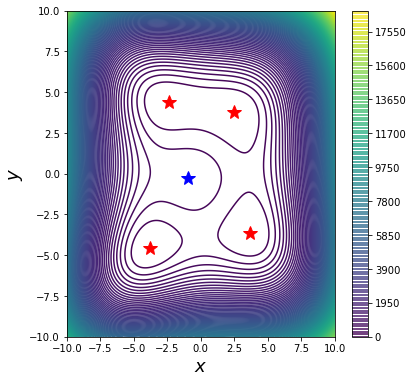

In [104]:
def wrap(f, X, Y):
    s = np.shape(X)
    return f(np.vstack([X.ravel(), Y.ravel()])).reshape(*s)

fig, ax = plt.subplots(figsize=(6,6))
x_p = y_p = np.linspace(-10, 10, 1000)
X, Y = np.meshgrid(x_p, y_p)
c = ax.contour(X, Y, wrap(h, X, Y), levels=150)
ax.plot(x_opt1[0], x_opt1[1], 'r*', markersize=15)
ax.plot(x_opt2[0], x_opt2[1], 'r*', markersize=15)
ax.plot(x_opt3[0], x_opt3[1], 'r*', markersize=15)
ax.plot(x_opt4[0], x_opt4[1], 'r*', markersize=15)
ax.plot(x_max[0], x_max[1], 'b*', markersize=15)

ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
plt.colorbar(c, ax=ax)
plt.show()